## Аналитика средствами Python

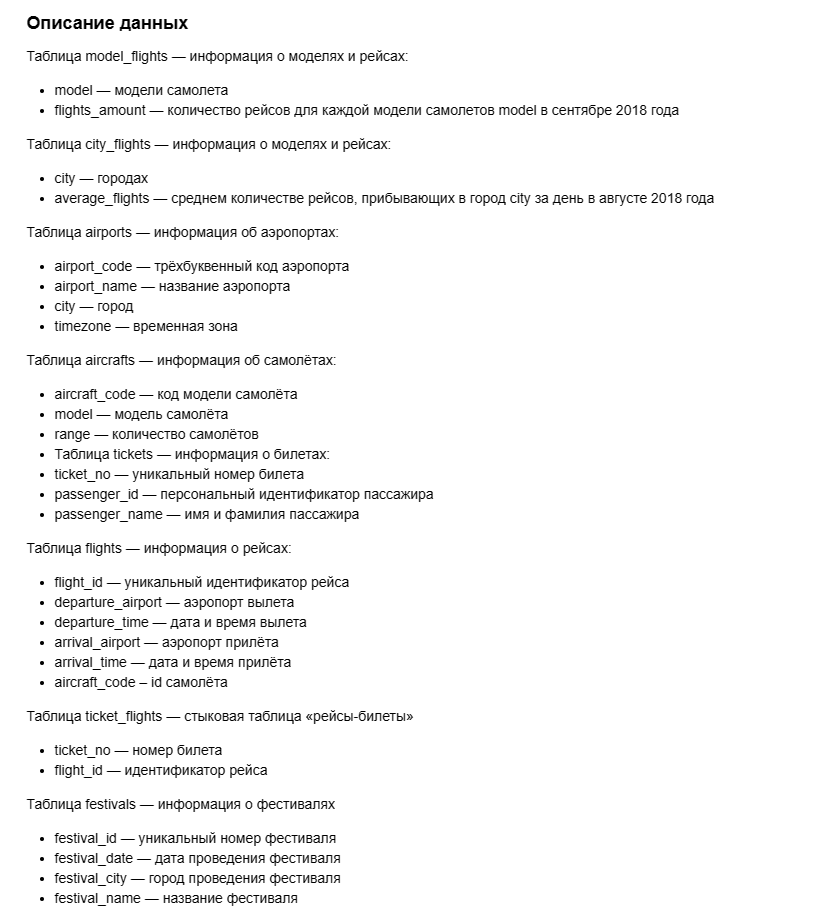

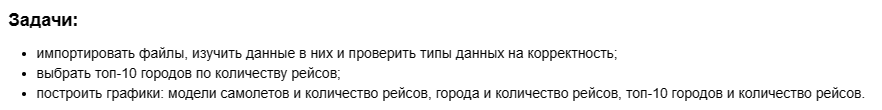

#### 1. Импорт  файлов и изучение данных

In [1]:
# Библиотеки
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_flights = pd.read_csv('****')
model_flights.info()
display(model_flights)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
city_flights = pd.read_csv('****')
city_flights.info()
display(city_flights)
city_flights['average_flights'] = round(city_flights['average_flights'], 0).astype('int')

display(city_flights)
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2
...,...,...
96,Чита,2
97,Элиста,5
98,Южно-Сахалинск,4
99,Якутск,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


#### Выводы

 В результате импорта файлов, получаем 2 таблицы:
 - model_flights имеет 2 столбца и 8 строк, пропусков нет, типы данных корректны
 - city_flights имеет 2 столбца и 101 строку, пропусков нет, тип данных столбца
  `average_flights` меняем на целочисленный

#### 2. Топ-10 городов по количеству рейсов

In [4]:
city_top = city_flights.sort_values(by = 'average_flights', ascending = False).head(10)
display(city_top)

,city,average_flights
43,Москва,130
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,12
20,Екатеринбург,11
67,Ростов-на-Дону,10
74,Сочи,10
84,Ульяновск,10
63,Пермь,10
10,Брянск,10


#### Выводы

Топ-10 городов по количеству рейсов получаем с помощью метода сортировки sort_values(). Лидером оказалась Москва.

#### 3. Графики.

##### Модели самолетов и количество рейсов

Text(0.5, 1, 'Модели самолетов и количество рейсов')

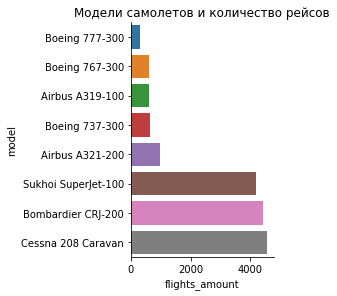

In [5]:
sort_model_flights = model_flights.sort_values(by = 'flights_amount')
sns.catplot(data=sort_model_flights, kind='bar', x= 'flights_amount', y='model', aspect=1, height=4 )
plt.title('Модели самолетов и количество рейсов')

##### Города и количество рейсов

Text(0.5, 1, 'Города и количество рейсов')

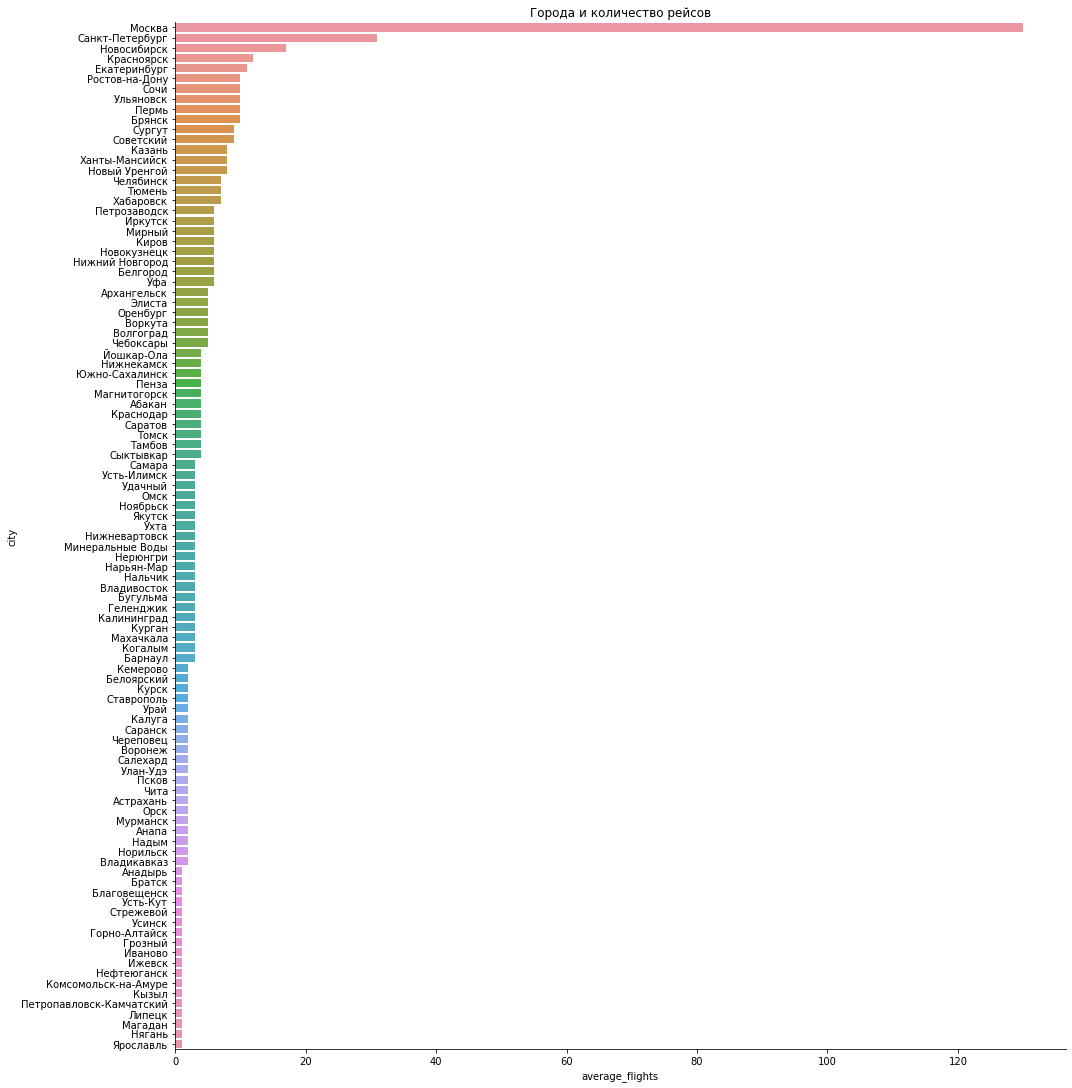

In [9]:
sort_city_flights = city_flights.sort_values(by = 'average_flights', ascending = False )
sns.catplot(data=sort_city_flights, kind='bar', x= 'average_flights', y='city', aspect=1, height=15 )
plt.title('Города и количество рейсов')

##### Топ-10 городов и количество рейсов

Text(0.5, 1, 'Топ-10 городов и количество рейсов')

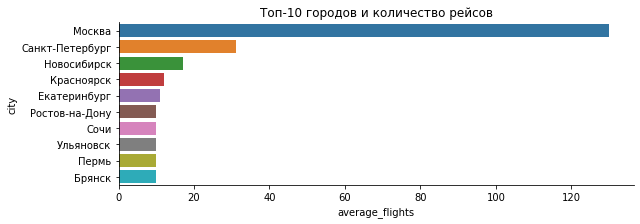

In [7]:
sns.catplot(data=city_top, kind='bar', x= 'average_flights', y='city', aspect=3, height=3)
plt.title('Топ-10 городов и количество рейсов')

#### Выводы

Изучая графики, мы выяснили следущее:
- Тройка самых популярных моделей самолетов состоит из 
`Cessna 208 Caravan`, `Bombardier CRJ-200` и `Sukhoi Superjet-100`
- Города с наименьшим самолетопотоком, имеющие в среднем по 1 самолету в день Анадырь, Братск, Благовещенск, Усть-Кут, Стрежевой, Горно-Алтайск, Грозный, Иваново, Ижевск, Нефтеюганск, Комсомольск-на-Амуре, Кызыл, Петропавловск-Камчатский, Липецк Магадан, Нягань, Ярославль
- Топ-10 городов по количеству прилетающих рейсов возглавляет Москва, за ней идут Санкт-Петербург и Новосибирск